In [11]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [12]:
outlets = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@NYTimes")

text_list = []
source_list = []
number_list = []
compound_list = []
pos_list = []
neu_list = []
neg_list = []

mean_compounds = []


for outlet in outlets:

    oldest_tweet = None
    tweet_counter = 1
    temp_compound= []
    
    public_tweets = api.user_timeline(outlet, count=100, max_id=oldest_tweet)
    


    for tweet in public_tweets:
        
        text_list.append(tweet["text"])
        source_list.append(tweet["user"]["name"])
        number_list.append(tweet_counter)
        
        
        scores=analyzer.polarity_scores(tweet["text"])
        
        compound_list.append(scores["compound"])
        temp_compound.append(scores["compound"])
            
        pos_list.append(scores["pos"])   
        neu_list.append(scores["neu"])   
        neg_list.append(scores["neg"])
        
        tweet_counter = tweet_counter + 1
        
        oldest_tweet = tweet["id"] - 1
        
    mean_compounds.append(np.mean(temp_compound))
            
summary_df = pd.DataFrame({
    "Text": text_list,
    "Source": source_list,
    "Tweets Ago": number_list,
    "Compound Score": compound_list,
    "Positive Score": pos_list,
    "Neutral Score": neu_list,
    "Negative Score": neg_list
})
        

bar_df = pd.DataFrame({
    "News Outlet": outlets,
    "Average Compound Scores": mean_compounds
})
    
    
    

In [13]:
BBC_df = summary_df.loc[summary_df["Source"] == "BBC News (UK)"]
CBS_df = summary_df.loc[summary_df["Source"] == "CBS News"]
CNN_df = summary_df.loc[summary_df["Source"] == "CNN"]
FOX_df = summary_df.loc[summary_df["Source"] == "Fox News"]
NYT_df = summary_df.loc[summary_df["Source"] == "The New York Times"]

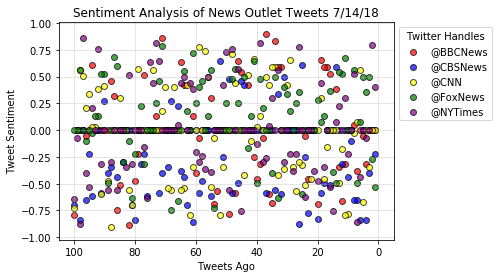

In [17]:
BBC_plot = plt.scatter(BBC_df["Tweets Ago"], BBC_df["Compound Score"], color="red", alpha=.7, edgecolors="black")
CBS_plot = plt.scatter(CBS_df["Tweets Ago"], CBS_df["Compound Score"], color="blue", alpha=.7, edgecolors="black")
CNN_plot = plt.scatter(CNN_df["Tweets Ago"], CNN_df["Compound Score"], color="yellow", alpha=.7, edgecolors="black")
FOX_plot = plt.scatter(FOX_df["Tweets Ago"], FOX_df["Compound Score"], color="green", alpha=.7, edgecolors="black")
NYT_plot = plt.scatter(NYT_df["Tweets Ago"], NYT_df["Compound Score"], color="purple", alpha=.7, edgecolors="black")

plt.title("Sentiment Analysis of News Outlet Tweets 7/14/18")
plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.legend(labels=outlets, bbox_to_anchor=(1,1), title="Twitter Handles")
plt.grid(alpha=.4)
plt.xlim(105,-5)
plt.savefig("scatter.png")

plt.show()


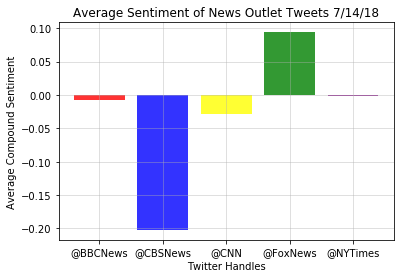

In [18]:
colors = ("red", "blue", "yellow", "green", "purple")
bar = plt.bar(bar_df["News Outlet"], bar_df["Average Compound Scores"], color=colors, alpha=.8)
plt.title("Average Sentiment of News Outlet Tweets 7/14/18")
plt.ylabel("Average Compound Sentiment")
plt.xlabel("Twitter Handles")
plt.grid(alpha=.5)
plt.savefig("bar.png")
plt.show()

In [19]:
summary_df.to_csv("output.csv")